<a href="https://colab.research.google.com/github/kridtapon/VVIX-Reversion-/blob/main/VVIX_Reversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.0 MB/s eta 0:00:00


In [ ]:
pip install --upgrade yfinance

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate RSI
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Define the stock symbol and time period
symbol = 'SI=F'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download market data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Download VIX and VVIX data
vix = yf.download('^VIX', start=start_date, end=end_date)['Close']
vvix = yf.download('^VVIX', start=start_date, end=end_date)['Close']

# Compute RSI on VIX
vix_rsi = calculate_rsi(vix, period=14)

# Merge data into a single DataFrame
df['VIX'] = vix
df['VVIX'] = vvix
df['VIX_RSI'] = vix_rsi

# Filter data for the test period (2020-2025)
df_test = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals
df_test['Entry'] = (df_test['VIX_RSI'] < 30)  # Overbought VIX with high VVIX
df_test['Exit'] = (df_test['VIX_RSI'] > 70)  # Oversold VIX with high VVIX

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df_test['Close'],
    entries=df_test['Entry'],
    exits=df_test['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-43-8feaa0fd5f9b>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-8feaa0fd5f9b>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                         1258 days 00:00:00
Start Value                              100000.0
End Value                           214851.833931
Total Return [%]                       114.851834
Benchmark Return [%]                     61.08205
Max Gross Exposure [%]                      100.0
Total Fees Paid                       4900.998081
Max Drawdown [%]                        41.220268
Max Drawdown Duration           844 days 00:00:00
Total Trades                                   15
Total Closed Trades                            15
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            66.666667
Best Trade [%]                          49.423426
Worst Trade [%]                        -18.194183
Avg Winning Trade [%]                   14.673307
Avg Losing Trade [%]                     -9.90961


In [ ]:
def rolling_vvix(df, period=14):
    df['vvix_rolling_min'] = df['VVIX'].rolling(window=period).min()
    return df

# Compute the rolling minimum of VVIX over a 14-day period
df = rolling_vvix(df, period=14)

# Filter data for the test period (2020-2025)
df_test = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals using rolling minimum of VVIX
df_test['Entry'] = (df_test['VVIX'] > df_test['vvix_rolling_min']) & (df_test['VIX_RSI'] < 30)  # Overbought VIX with VVIX above rolling minimum
df_test['Exit'] = (df_test['VIX_RSI'] > 70)  # Oversold VIX with VVIX below rolling minimum

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df_test['Close'],
    entries=df_test['Entry'],
    exits=df_test['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

<ipython-input-44-54058328d030>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-54058328d030>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Start                                2020-01-02 00:00:00
End                                  2024-12-31 00:00:00
Period                                1258 days 00:00:00
Start Value                                     100000.0
End Value                                  252267.658229
Total Return [%]                              152.267658
Benchmark Return [%]                            61.08205
Max Gross Exposure [%]                             100.0
Total Fees Paid                              4787.677811
Max Drawdown [%]                               28.122292
Max Drawdown Duration                  407 days 00:00:00
Total Trades                                          13
Total Closed Trades                                   13
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                   84.615385
Best Trade [%]                                 49.423426
Worst Trade [%]                

Streaming output truncated to the last 5000 lines.
<ipython-input-34-4c0c48db6c4e>:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-4c0c48db6c4e>:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-4c0c48db6c4e>:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Best Parameters:
{'VIX_RSI_Period': 13, 'Entry_Threshold': 40, 'Exit_Threshold': 70}
Start                                2020-01-02 00:00:00
End                                  2024-12-31 00:00:00
Period                                1258 days 00:00:00
Start Value                                     100000.0
End Value                                  290850.775193
Total Return [%]                              190.850775
Benchmark Return [%]                            61.08205
Max Gross Exposure [%]                             100.0
Total Fees Paid                               8468.83129
Max Drawdown [%]                                23.91783
Max Drawdown Duration                  241 days 00:00:00
Total Trades                                          22
Total Closed Trades                                   22
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                   59.090909
Bes

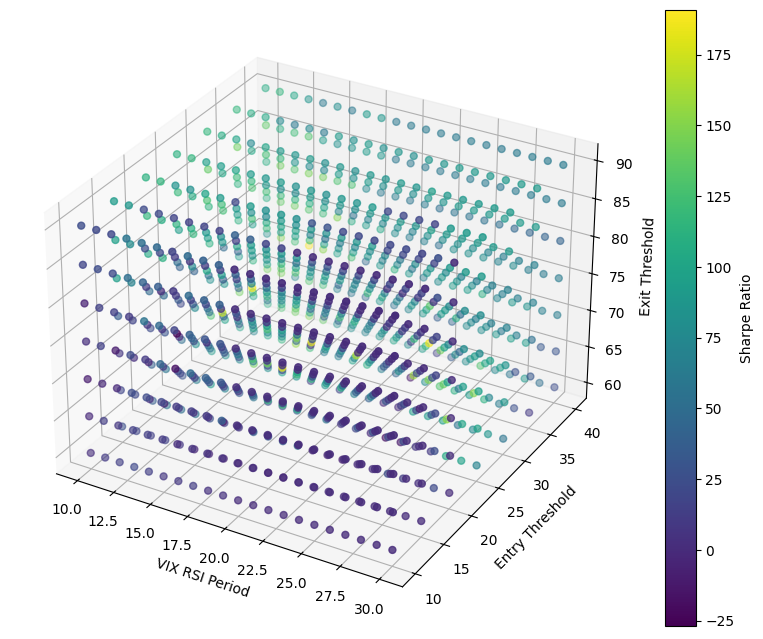

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate RSI
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Define the stock symbol and time period
symbol = 'SI=F'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download market data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Download VIX and VVIX data
vix = yf.download('^VIX', start=start_date, end=end_date)['Close']
vvix = yf.download('^VVIX', start=start_date, end=end_date)['Close']

# Compute RSI on VIX
vix_rsi = calculate_rsi(vix, period=14)

# Merge data into a single DataFrame
df['VIX'] = vix
df['VVIX'] = vvix
df['VIX_RSI'] = vix_rsi

# Define parameter grid for optimization
vix_rsi_periods = range(10, 31)
entry_thresholds = range(10, 41, 5)
exit_thresholds = range(60, 91, 5)

# Generate all combinations of parameters using itertools.product
param_combinations = itertools.product(vix_rsi_periods, entry_thresholds, exit_thresholds)

# Initialize variables to store the best result
best_total_return = -np.inf
best_params = {}

# Prepare lists to store the optimization results for 3D plot
results = []

# Iterate through the parameter combinations
for vix_rsi_period, entry_threshold, exit_threshold in param_combinations:
    # Recalculate RSI with new period
    vix_rsi = calculate_rsi(vix, period=vix_rsi_period)
    df['VIX_RSI'] = vix_rsi

    # Filter data for the test period (2020-2025)
    df_test = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Define Entry and Exit signals
    df_test['Entry'] = (df_test['VIX_RSI'] < entry_threshold)
    df_test['Exit'] = (df_test['VIX_RSI'] > exit_threshold)

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_test['Close'],
        entries=df_test['Entry'],
        exits=df_test['Exit'],
        init_cash=100_000,
        fees=0.001,
        slippage=0.002,
        freq='D'
    )

    # Calculate Total Return or any other performance metric
    total_return = portfolio.stats()['Total Return [%]']

    # Store the results for 3D plot
    results.append((vix_rsi_period, entry_threshold, exit_threshold, total_return))

    # Update best parameters if current combination is better
    if total_return > best_total_return:
        best_total_return = total_return
        best_params = {
            'VIX_RSI_Period': vix_rsi_period,
            'Entry_Threshold': entry_threshold,
            'Exit_Threshold': exit_threshold
        }

# Display the best parameters
print("Best Parameters:")
print(best_params)

# Final backtest with the best parameters
vix_rsi = calculate_rsi(vix, period=best_params['VIX_RSI_Period'])
df['VIX_RSI'] = vix_rsi

# Filter data for the test period (2020-2025)
df_test = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

df_test['Entry'] = (df_test['VIX_RSI'] < best_params['Entry_Threshold'])
df_test['Exit'] = (df_test['VIX_RSI'] > best_params['Exit_Threshold'])

# Backtest using vectorbt with the best parameters
portfolio = vbt.Portfolio.from_signals(
    close=df_test['Close'],
    entries=df_test['Entry'],
    exits=df_test['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

# Prepare data for 3D plot
vix_rsi_periods, entry_thresholds, exit_thresholds, total_returns = zip(*results)

# Create a 3D plot of the optimization results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the parameter combinations and the corresponding Total Return
sc = ax.scatter(vix_rsi_periods, entry_thresholds, exit_thresholds, c=total_returns, cmap='viridis', s=25)
ax.set_xlabel('VIX RSI Period')
ax.set_ylabel('Entry Threshold')
ax.set_zlabel('Exit Threshold')

# Add color bar
plt.colorbar(sc, ax=ax, label='Total Return')

# Display the plot
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate RSI
def calculate_rsi(df, period=14):
    delta = df.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def rolling_vvix(df, period=14):
    df['vvix_rolling_min'] = df['VVIX'].rolling(window=period).min()
    return df

# Define the stock symbol and time period
symbol = 'SI=F'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download market data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Download VIX and VVIX data
vix = yf.download('^VIX', start=start_date, end=end_date)['Close']
vvix = yf.download('^VVIX', start=start_date, end=end_date)['Close']

# Compute RSI on VIX
vix_rsi = calculate_rsi(vix, period=14)

# Merge data into a single DataFrame
df['VIX'] = vix
df['VVIX'] = vvix
df['VIX_RSI'] = vix_rsi

# Compute the rolling minimum of VVIX over a 14-day period
df = rolling_vvix(df, period=14)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals using rolling minimum of VVIX
df['Entry'] = (df['VVIX'] > df['vvix_rolling_min']) & (df['VIX_RSI'] < 30)  # Overbought VIX with VVIX above rolling minimum
df['Exit'] = (df['VIX_RSI'] > 70)  # Oversold VIX with VVIX below rolling minimum

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-32-bccb7396c4a4>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-bccb7396c4a4>:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Start                                2020-01-02 00:00:00
End                                  2024-12-31 00:00:00
Period                                1258 days 00:00:00
Start Value                                     100000.0
End Value                                  252267.658229
Total Return [%]                              152.267658
Benchmark Return [%]                            61.08205
Max Gross Exposure [%]                             100.0
Total Fees Paid                              4787.677811
Max Drawdown [%]                               28.122292
Max Drawdown Duration                  407 days 00:00:00
Total Trades                                          13
Total Closed Trades                                   13
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                   84.615385
Best Trade [%]                                 49.423426
Worst Trade [%]                

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


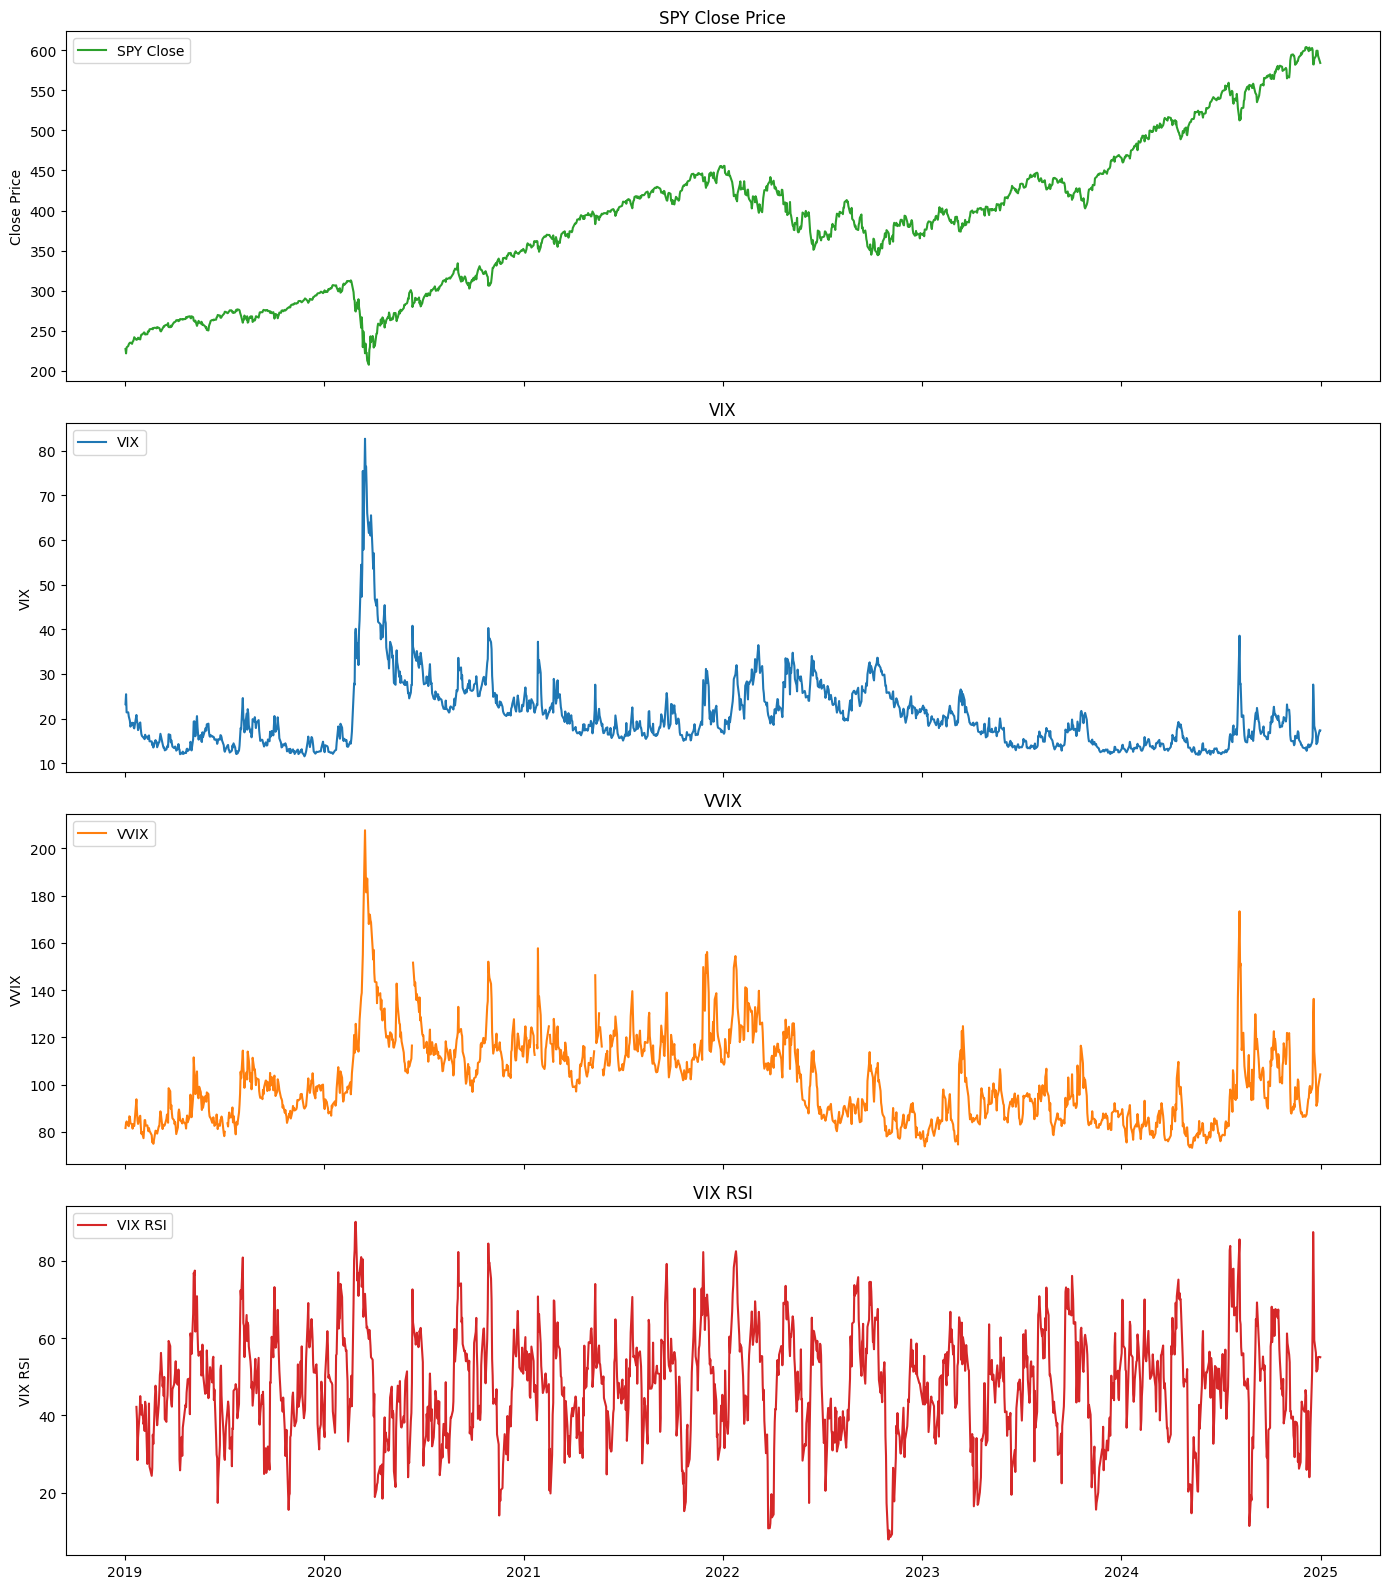

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate RSI
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Define the stock symbol and time period
symbol = 'SI=F'
start_date = '2020-01-01'
end_date = '2025-01-01'

# Download market data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Download VIX and VVIX data
vix = yf.download('^VIX', start=start_date, end=end_date)['Close']
vvix = yf.download('^VVIX', start=start_date, end=end_date)['Close']

# Compute RSI on VIX
vix_rsi = calculate_rsi(vix, period=14)

# Merge data into a single DataFrame
df['VIX'] = vix
df['VVIX'] = vvix
df['VIX_RSI'] = vix_rsi

# Create a figure with subplots (4 rows and 1 column)
fig, axs = plt.subplots(4, 1, figsize=(14, 16), sharex=True)

# Plot Close price in the first panel
axs[0].plot(df.index, df['Close'], color='tab:green', label='SPY Close')
axs[0].set_ylabel('Close Price')
axs[0].set_title('SPY Close Price')
axs[0].legend(loc='upper left')

# Plot VIX in the second panel
axs[1].plot(df.index, df['VIX'], color='tab:blue', label='VIX')
axs[1].set_ylabel('VIX')
axs[1].set_title('VIX')
axs[1].legend(loc='upper left')

# Plot VVIX in the third panel
axs[2].plot(df.index, df['VVIX'], color='tab:orange', label='VVIX')
axs[2].set_ylabel('VVIX')
axs[2].set_title('VVIX')
axs[2].legend(loc='upper left')

# Plot VIX RSI in the fourth panel
axs[3].plot(df.index, df['VIX_RSI'], color='tab:red', label='VIX RSI')
axs[3].set_ylabel('VIX RSI')
axs[3].set_title('VIX RSI')
axs[3].legend(loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-45-a08018dc317c>:39: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



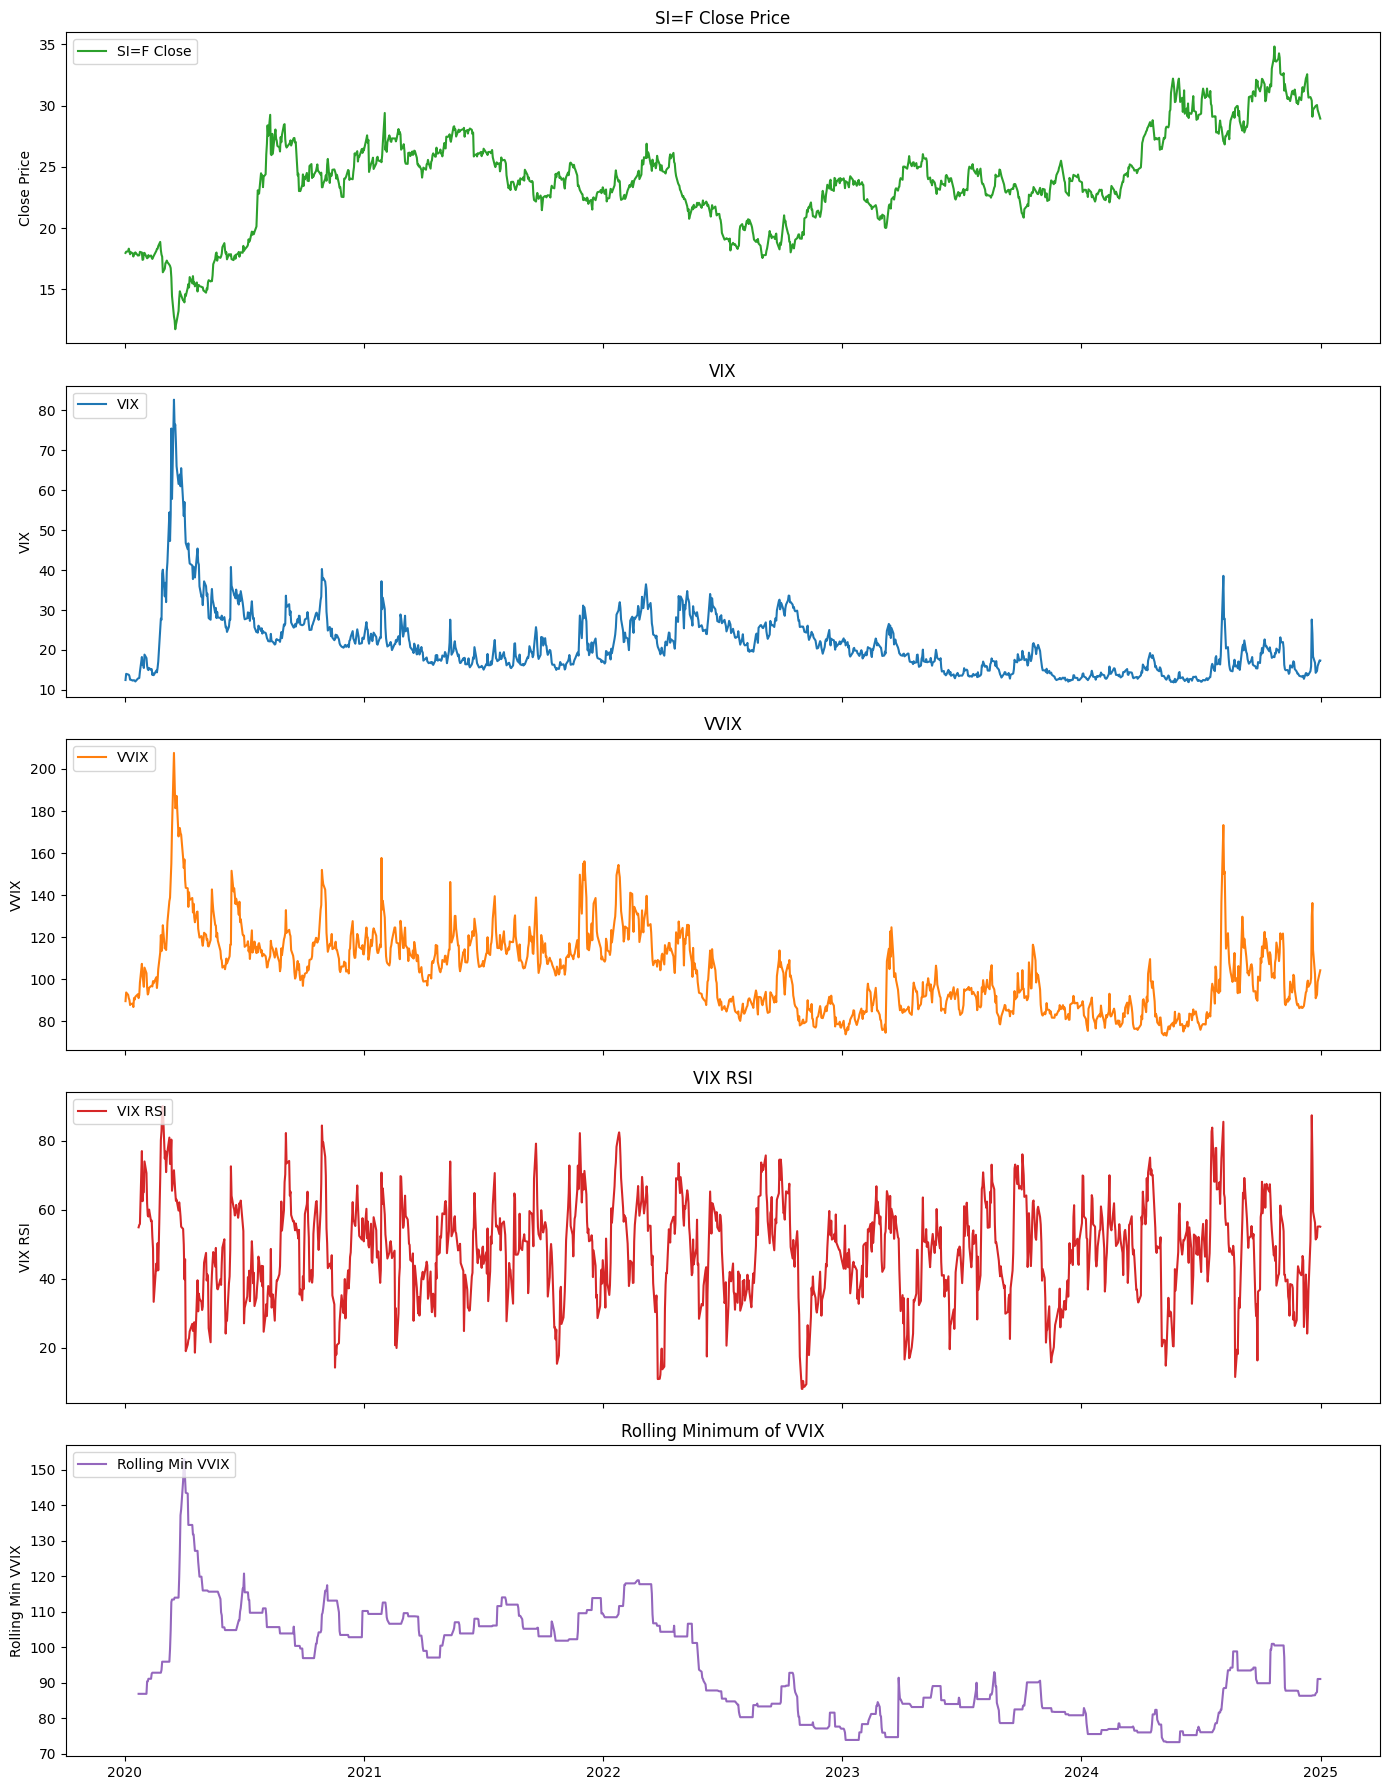

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate RSI
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Function to calculate rolling minimum of VVIX
def rolling_vvix(df, period=14):
    df['vvix_rolling_min'] = df['VVIX'].rolling(window=period).min()
    return df

# Define the stock symbol and time period
symbol = 'SI=F'
start_date = '2020-01-01'
end_date = '2025-01-01'

# Download market data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Download VIX and VVIX data
vix = yf.download('^VIX', start=start_date, end=end_date)['Close']
vvix = yf.download('^VVIX', start=start_date, end=end_date)['Close']

# Compute RSI on VIX
vix_rsi = calculate_rsi(vix, period=14)

# Merge data into a single DataFrame
df['VIX'] = vix
df['VVIX'] = vvix
df['VIX_RSI'] = vix_rsi

df.fillna(method='ffill', inplace=True)

# Compute the rolling minimum of VVIX
df = rolling_vvix(df, period=14)

# Create a figure with subplots (5 rows and 1 column)
fig, axs = plt.subplots(5, 1, figsize=(14, 18), sharex=True)

# Plot Close price in the first panel
axs[0].plot(df.index, df['Close'], color='tab:green', label='SI=F Close')
axs[0].set_ylabel('Close Price')
axs[0].set_title('SI=F Close Price')
axs[0].legend(loc='upper left')

# Plot VIX in the second panel
axs[1].plot(df.index, df['VIX'], color='tab:blue', label='VIX')
axs[1].set_ylabel('VIX')
axs[1].set_title('VIX')
axs[1].legend(loc='upper left')

# Plot VVIX in the third panel
axs[2].plot(df.index, df['VVIX'], color='tab:orange', label='VVIX')
axs[2].set_ylabel('VVIX')
axs[2].set_title('VVIX')
axs[2].legend(loc='upper left')

# Plot VIX RSI in the fourth panel
axs[3].plot(df.index, df['VIX_RSI'], color='tab:red', label='VIX RSI')
axs[3].set_ylabel('VIX RSI')
axs[3].set_title('VIX RSI')
axs[3].legend(loc='upper left')

# Plot Rolling Minimum of VVIX in the fifth panel
axs[4].plot(df.index, df['vvix_rolling_min'], color='tab:purple', label='Rolling Min VVIX')
axs[4].set_ylabel('Rolling Min VVIX')
axs[4].set_title('Rolling Minimum of VVIX')
axs[4].legend(loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
